# The `pandas.plotting` module
Pandas provides some extra plotting functions for some new plot types.

## About the Data
In this notebook, we will be working with Facebook's stock price throughout 2018 (obtained using the [`stock_analysis` package](https://github.com/stefmolin/stock-analysis)).

## Setup

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

fb = pd.read_csv(
    'data/fb_stock_prices_2018.csv', index_col='date', parse_dates=True
)

## Scatter matrix
Easily create scatter plots between all columns in the dataset:

array([[<AxesSubplot:xlabel='open', ylabel='open'>,
        <AxesSubplot:xlabel='high', ylabel='open'>,
        <AxesSubplot:xlabel='low', ylabel='open'>,
        <AxesSubplot:xlabel='close', ylabel='open'>,
        <AxesSubplot:xlabel='volume', ylabel='open'>],
       [<AxesSubplot:xlabel='open', ylabel='high'>,
        <AxesSubplot:xlabel='high', ylabel='high'>,
        <AxesSubplot:xlabel='low', ylabel='high'>,
        <AxesSubplot:xlabel='close', ylabel='high'>,
        <AxesSubplot:xlabel='volume', ylabel='high'>],
       [<AxesSubplot:xlabel='open', ylabel='low'>,
        <AxesSubplot:xlabel='high', ylabel='low'>,
        <AxesSubplot:xlabel='low', ylabel='low'>,
        <AxesSubplot:xlabel='close', ylabel='low'>,
        <AxesSubplot:xlabel='volume', ylabel='low'>],
       [<AxesSubplot:xlabel='open', ylabel='close'>,
        <AxesSubplot:xlabel='high', ylabel='close'>,
        <AxesSubplot:xlabel='low', ylabel='close'>,
        <AxesSubplot:xlabel='close', ylabel='close'>,
    

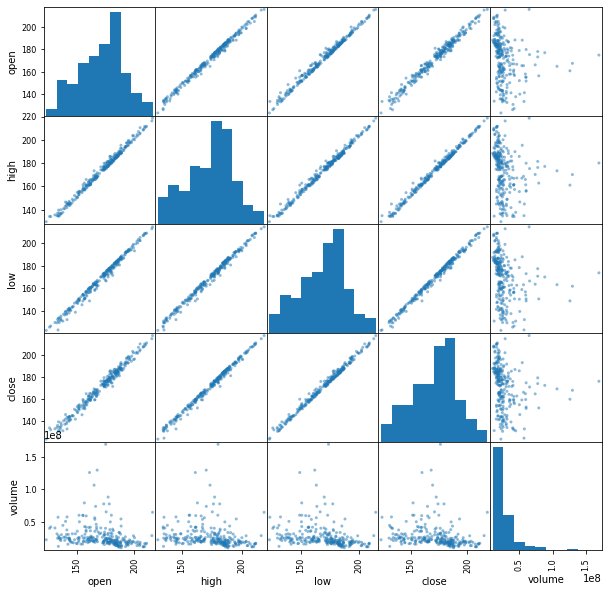

In [3]:
from pandas.plotting import scatter_matrix
scatter_matrix(fb, figsize=(10, 10))

Changing the diagonal from histograms to KDE:

array([[<AxesSubplot:xlabel='open', ylabel='open'>,
        <AxesSubplot:xlabel='high', ylabel='open'>,
        <AxesSubplot:xlabel='low', ylabel='open'>,
        <AxesSubplot:xlabel='close', ylabel='open'>,
        <AxesSubplot:xlabel='volume', ylabel='open'>],
       [<AxesSubplot:xlabel='open', ylabel='high'>,
        <AxesSubplot:xlabel='high', ylabel='high'>,
        <AxesSubplot:xlabel='low', ylabel='high'>,
        <AxesSubplot:xlabel='close', ylabel='high'>,
        <AxesSubplot:xlabel='volume', ylabel='high'>],
       [<AxesSubplot:xlabel='open', ylabel='low'>,
        <AxesSubplot:xlabel='high', ylabel='low'>,
        <AxesSubplot:xlabel='low', ylabel='low'>,
        <AxesSubplot:xlabel='close', ylabel='low'>,
        <AxesSubplot:xlabel='volume', ylabel='low'>],
       [<AxesSubplot:xlabel='open', ylabel='close'>,
        <AxesSubplot:xlabel='high', ylabel='close'>,
        <AxesSubplot:xlabel='low', ylabel='close'>,
        <AxesSubplot:xlabel='close', ylabel='close'>,
    

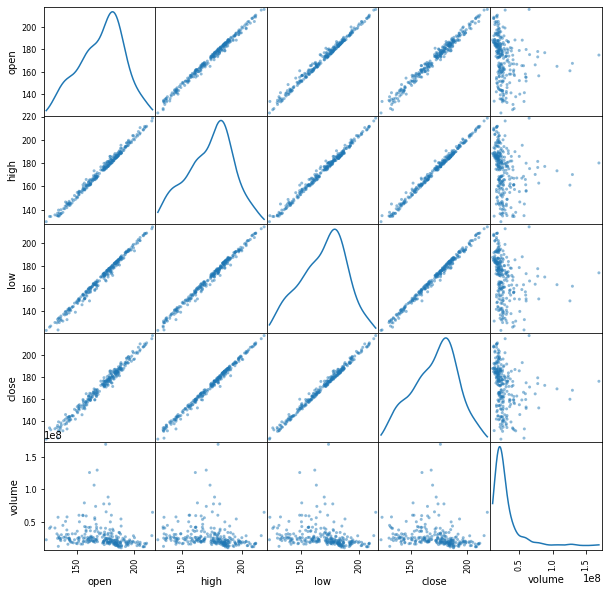

In [4]:
scatter_matrix(fb, figsize=(10, 10), diagonal='kde')

## Lag plot
Lag plots let us see how the variable correlates with past observations of itself. Random data has no pattern:

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

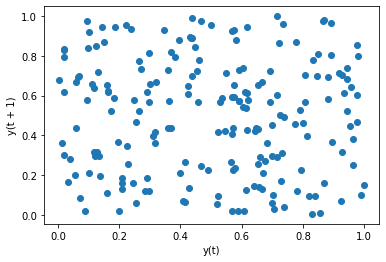

In [6]:
from pandas.plotting import lag_plot
np.random.seed(0) # make this repeatable
lag_plot(pd.Series(np.random.random(size=200)))

Data with some level of correlation to itself (autocorrelation) may have patterns. Stock prices are highly autocorrelated:

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

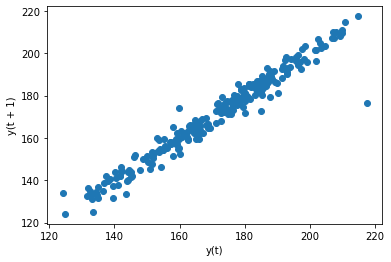

In [7]:
lag_plot(fb.close)

The default lag is 1, but we can alter this with the `lag` parameter. Let's look at a 5 day lag (a week of trading activity):

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 5)'>

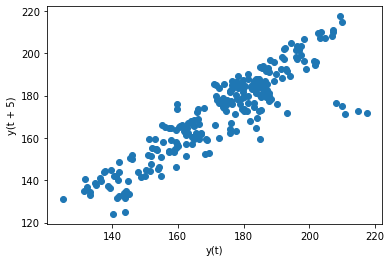

In [8]:
lag_plot(fb.close, lag=5)

## Autocorrelation plots
We can use the autocorrelation plot to see if this relationship may be meaningful or is just noise. Random data will not have any significant autocorrelation (it stays within the bounds below):

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

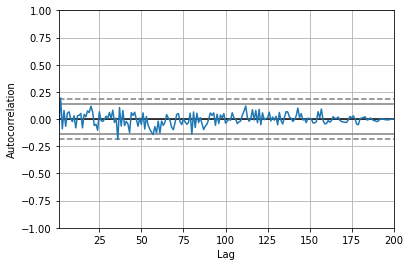

In [10]:
from pandas.plotting import autocorrelation_plot
np.random.seed(0) # make this repeatable
autocorrelation_plot(pd.Series(np.random.random(size=200))) #when near to 0, there is no correlation

Stock data, on the other hand, does have significant autocorrelation:

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

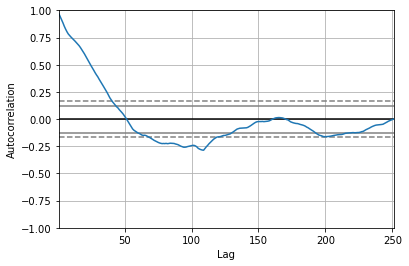

In [11]:
autocorrelation_plot(fb.close)

## Bootstrap plot
This plot helps us understand the uncertainty in our summary statistics:

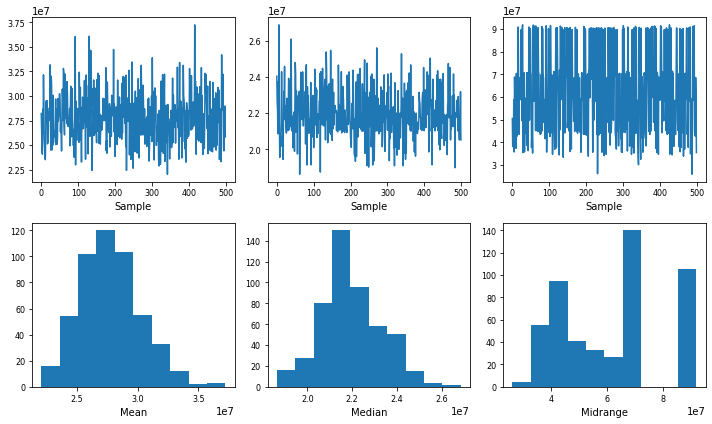

In [9]:
from pandas.plotting import bootstrap_plot
fig = bootstrap_plot(fb.volume, fig=plt.figure(figsize=(10, 6)))

<hr>

<div style="overflow: hidden; margin-bottom: 10px;">
    <div style="float: left;">
        <a href="./2-plotting_with_pandas.ipynb">
            <button>&#8592; Previous Notebook</button>
        </a>
    </div>
    <div style="float: right;">
        <a href="../../solutions/ch_05/solutions.ipynb">
            <button>Solutions</button>
        </a>
        <a href="../ch_06/1-introduction_to_seaborn.ipynb">
            <button>Chapter 6 &#8594;</button>
        </a>
    </div>
</div>
<hr>